In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.utils import load_img, img_to_array, to_categorical
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = 'datasets/5-TRAFFIC-ANALYSIS-CNN'
image_width, image_height = 64, 64
num_classes = len(os.listdir(dataset_path))

X, y = [], []
class_names = {}

for class_name in os.listdir(dataset_path):
    if class_name not in class_names:
        class_names[class_name] = len(class_names)
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = load_img(image_path, target_size=(image_width, image_height))
        image = img_to_array(image)
        X.append(image)
        y.append(class_names[class_name])


X = np.array(X) / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y, num_classes=num_classes), test_size=0.2)

In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [4]:
model.fit(X_train, y_train, epochs=10, batch_size=32,verbose=0)
score, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Score: {(score*100):.2f}% | Accuracy: {(acc*100):.2f} %")

Score: 4.49% | Accuracy: 98.57 %


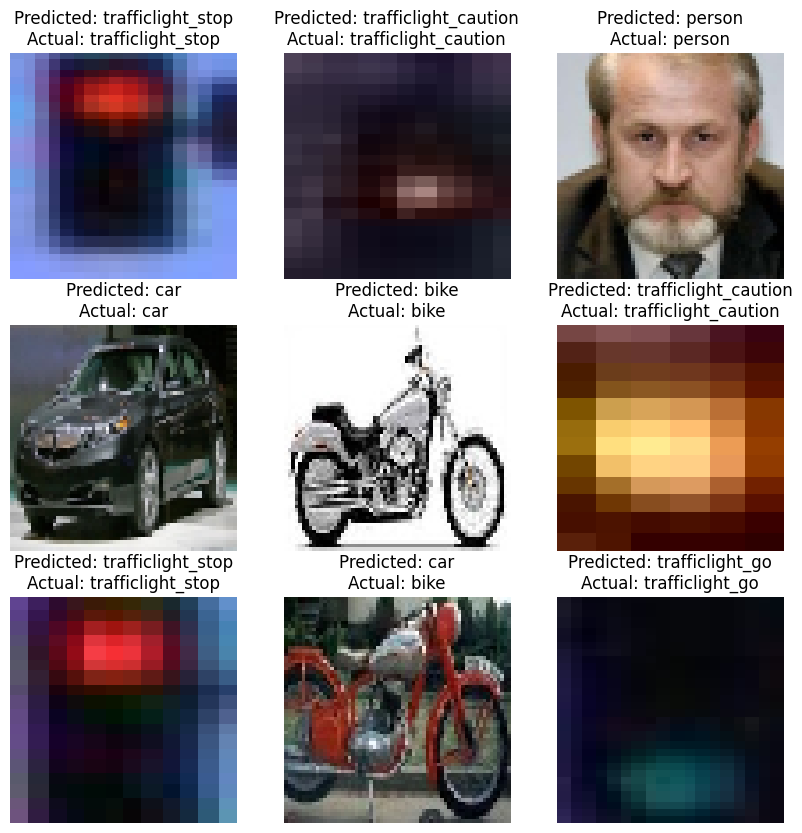

In [5]:
random_indexes = np.random.choice(len(X_test), size=9)
reverse_map = {v:k for k,v in class_names.items()}

y_pred = model.predict(X_test[random_indexes], verbose=0)
y_pred_class = [reverse_map[np.argmax(y)] for y in y_pred]
y_test = np.argmax(y_test[random_indexes], axis=1)
y_test_class = [reverse_map[y] for y in y_test]

fig, ax = plt.subplots(3,3, figsize=(10,10))

for i, index in enumerate(random_indexes):
    ax[i // 3, i % 3].imshow(X_test[index])
    ax[i // 3, i % 3].set_title(f"Predicted: {y_pred_class[i]}\nActual: {y_test_class[i]}")
    ax[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()